In [18]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

infile = open('../Data/MAPK14_rmsds','rb')
#each row is a different combination of ligand and structure
#outer loop is for structure
#inner loop is for ligand
rmsd_set = pickle.load(infile) 
infile.close()

infile = open('../Data/MAPK14_ligand_names','rb')
ligands = pickle.load(infile)
infile.close()

infile = open('../Data/MAPK14_gscores','rb')
gscores = pickle.load(infile)
infile.close()

In [19]:
#row is for structure
#column is for ligand
#each element is a list of all poses
inv_rmsd = []
counter = 0
for i in range(26):
    arr = []
    for j in range(26):
        arr.append(rmsd_set[counter][:])
        counter += 1
    inv_rmsd.append(arr)

In [20]:
#row is for ligand
#column is for structure
#each element is a list of all poses
rmsd = []
for i in range(len(ligands)):
    arr = []
    for j in range(len(ligands)):
        arr.append(inv_rmsd[j][i][:])
    rmsd.append(arr)
    

In [21]:
print("With self docking:")
print()
self_gscore_pairs = []
self_rmsd_pairs = []
self_simm = 0
self_simm_gscore = 0
self_simm_rmsd = 0
self_gscore_rmsds = []

for i in range(len(ligands)):
    gscore_best = min(gscores[i])
    min_rmsds = []
    for j in range(len(ligands)):
        min_rmsds.append((min(rmsd[i][j][:]), rmsd[i][j].index(min(rmsd[i][j][:]))))
    rmsd_best = min(min_rmsds)
    if ligands[gscores[i].index(gscore_best)] == ligands[min_rmsds.index(rmsd_best)]:
        self_simm += 1
    if ligands[gscores[i].index(gscore_best)] == ligands[i]:
        self_simm_gscore += 1
    if ligands[min_rmsds.index(rmsd_best)] == ligands[i]:
        self_simm_rmsd += 1
    self_gscore_pairs.append(ligands[gscores[i].index(gscore_best)])
    self_rmsd_pairs.append(ligands[min_rmsds.index(rmsd_best)])
    print("For ligand ", ligands[i], " GSCORE best pose is with the protein corresponding to ligand ", ligands[gscores[i].index(gscore_best)])
    print("The corresponding gscore is ", gscore_best)
    print("The RMSD for this combination is ", rmsd[i][gscores[i].index(gscore_best)][0])
    self_gscore_rmsds.append(rmsd[i][gscores[i].index(gscore_best)][0])
    print("For ligand ", ligands[i], " RMSD best is pose ", rmsd_best[1], "is with the protein corresponding to ligand ", ligands[min_rmsds.index(rmsd_best)])
    print("The corresponding rmsd is ", rmsd_best[0])
    print()

With self docking:

For ligand  3HUB  GSCORE best pose is with the protein corresponding to ligand  3HUB
The corresponding gscore is  -10.58
The RMSD for this combination is  0.463086673498
For ligand  3HUB  RMSD best is pose  0 is with the protein corresponding to ligand  3HUB
The corresponding rmsd is  0.463086673498

For ligand  2YIX  GSCORE best pose is with the protein corresponding to ligand  2YIX
The corresponding gscore is  -11.11
The RMSD for this combination is  0.720546960368
For ligand  2YIX  RMSD best is pose  0 is with the protein corresponding to ligand  1KV1
The corresponding rmsd is  0.524619282515

For ligand  3HUC  GSCORE best pose is with the protein corresponding to ligand  4DLI
The corresponding gscore is  -8.97
The RMSD for this combination is  32.706471458
For ligand  3HUC  RMSD best is pose  35 is with the protein corresponding to ligand  3HUC
The corresponding rmsd is  0.451410204037

For ligand  3D83  GSCORE best pose is with the protein corresponding to liga

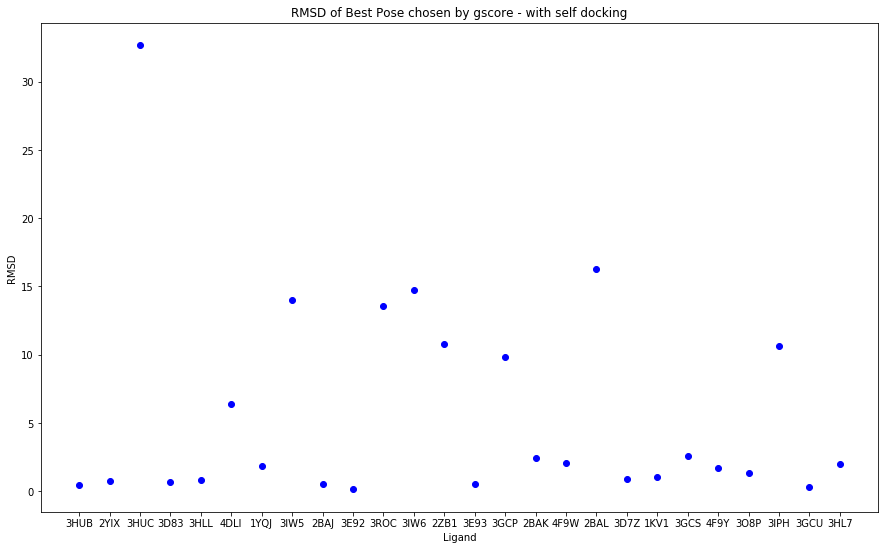

In [28]:
plt.scatter(ligands, self_gscore_rmsds, color = "b")
plt.title('RMSD of Best Pose chosen by gscore - with self docking')
plt.xlabel('Ligand')
plt.ylabel('RMSD')
plt.show()

In [25]:
print("Average RMSD over all: ", sum(self_gscore_rmsds) / 26)

Average RMSD over all:  5.723165099122732


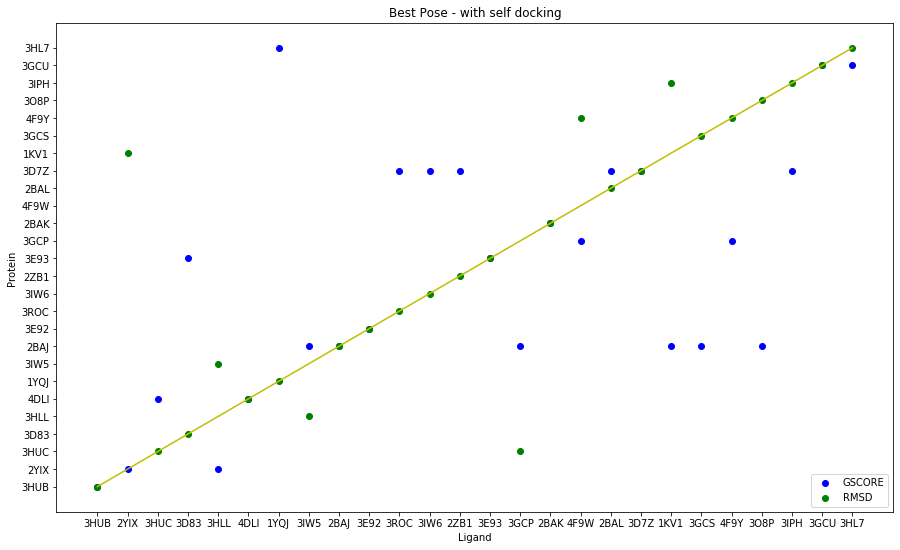

In [27]:
plt.plot(ligands, ligands, color = "y")
plt.scatter(ligands, self_gscore_pairs, color = "b", label = "GSCORE")
plt.scatter(ligands, self_rmsd_pairs, color = "g", label = "RMSD")
plt.legend(loc = "lower right")
plt.title('Best Pose - with self docking')
plt.xlabel('Ligand')
plt.ylabel('Protein')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [29]:
print("The gscore and rmsd show the same best score with probability ", self_simm / 26)
print("The gscore chooses self docking with probability ", self_simm_gscore / 26)
print("The rmsd chooses self docking with probability ", self_simm_rmsd / 26)

The gscore and rmsd show the same best score with probability  0.3076923076923077
The gscore chooses self docking with probability  0.34615384615384615
The rmsd chooses self docking with probability  0.7692307692307693


In [30]:
cross_gscores = gscores
cross_rmsd = rmsd
for i in range(26):
    for j in range(26):
        if i == j:
            cross_gscores[i][j] = 100
            cross_rmsd[i][j] = [100]

In [31]:
print("Without self docking:")
print()
cross_gscore_pairs = []
cross_rmsd_pairs = []
simm = 0
simm_gscore = 0
simm_rmsd = 0
cross_gscore_rmsds = []

for i in range(26):
    gscore_best = min(cross_gscores[i])
    min_rmsds = []
    for j in range(26):
        min_rmsds.append((min(cross_rmsd[i][j][:]), cross_rmsd[i][j].index(min(cross_rmsd[i][j][:]))))
    rmsd_best = min(min_rmsds)
    if ligands[cross_gscores[i].index(gscore_best)] == ligands[min_rmsds.index(rmsd_best)]:
        simm += 1
    if ligands[cross_gscores[i].index(gscore_best)] == ligands[i]:
        simm_gscore += 1
    if ligands[min_rmsds.index(rmsd_best)] == ligands[i]:
        simm_rmsd += 1
    cross_gscore_pairs.append(ligands[gscores[i].index(gscore_best)])
    cross_rmsd_pairs.append(ligands[min_rmsds.index(rmsd_best)])
    print("For ligand ", ligands[i], " GSCORE best pose is with the protein corresponding to ligand ", ligands[cross_gscores[i].index(gscore_best)])
    print("The corresponding gscore is ", gscore_best)
    print("The RMSD for this combination is ", cross_rmsd[i][cross_gscores[i].index(gscore_best)][0])
    cross_gscore_rmsds.append(cross_rmsd[i][cross_gscores[i].index(gscore_best)][0])
    print("For ligand ", ligands[i], " RMSD best is pose ", rmsd_best[1], "is with the protein corresponding to ligand ", ligands[min_rmsds.index(rmsd_best)])
    print("The corresponding rmsd is ", rmsd_best[0])
    print()

Without self docking:

For ligand  3HUB  GSCORE best pose is with the protein corresponding to ligand  2YIX
The corresponding gscore is  -10.17
The RMSD for this combination is  1.86369122792
For ligand  3HUB  RMSD best is pose  2 is with the protein corresponding to ligand  3ROC
The corresponding rmsd is  0.641651235695

For ligand  2YIX  GSCORE best pose is with the protein corresponding to ligand  3D7Z
The corresponding gscore is  -10.91
The RMSD for this combination is  1.39786397824
For ligand  2YIX  RMSD best is pose  0 is with the protein corresponding to ligand  1KV1
The corresponding rmsd is  0.524619282515

For ligand  3HUC  GSCORE best pose is with the protein corresponding to ligand  4DLI
The corresponding gscore is  -8.97
The RMSD for this combination is  32.706471458
For ligand  3HUC  RMSD best is pose  70 is with the protein corresponding to ligand  3GCP
The corresponding rmsd is  1.06027883935

For ligand  3D83  GSCORE best pose is with the protein corresponding to liga

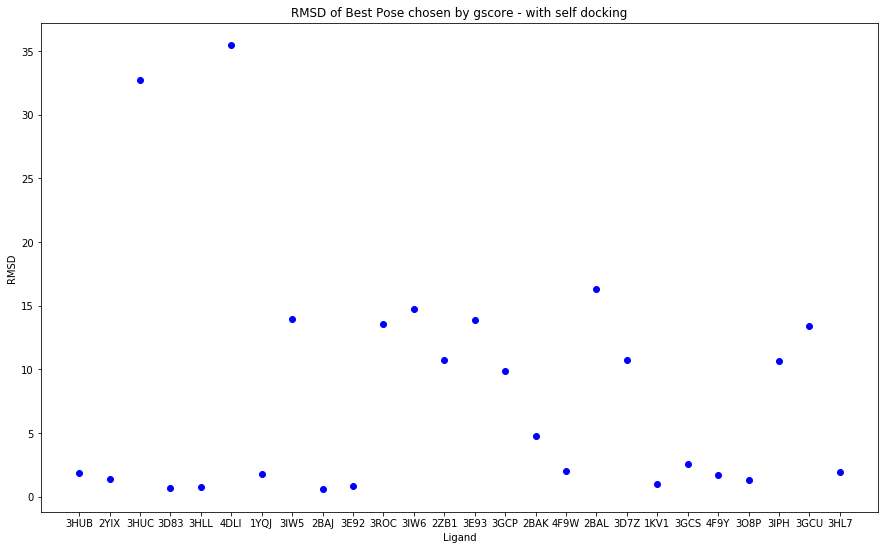

In [32]:
plt.scatter(ligands, cross_gscore_rmsds, color = "b")
plt.title('RMSD of Best Pose chosen by gscore - with self docking')
plt.xlabel('Ligand')
plt.ylabel('RMSD')
plt.show()

In [33]:
print("Average RMSD over cross docking: ", sum(cross_gscore_rmsds) / 26)

Average RMSD over cross docking:  8.446453986884922


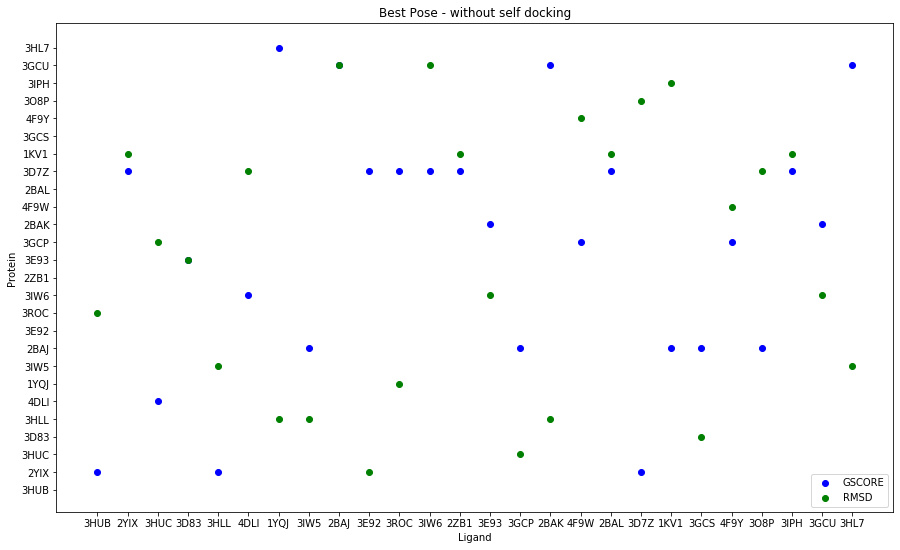

In [34]:
plt.plot(ligands, ligands, color = "w")
plt.scatter(ligands, cross_gscore_pairs, color = "b", label = "GSCORE")
plt.scatter(ligands, cross_rmsd_pairs, color = "g", label = "RMSD")
plt.legend(loc = "lower right")
plt.title('Best Pose - without self docking')
plt.xlabel('Ligand')
plt.ylabel('Protein')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [35]:
print("The gscore and rmsd show the same best score with probability ", simm / 26)

The gscore and rmsd show the same best score with probability  0.07692307692307693
